# Exploratory Data Analysis (EDA)

Start by importing the packages needed for EDA.

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Import plotly and a way to use sankey diagram
sns.set_theme()

In [54]:
df = pd.read_csv("../data/clean_data.csv", index_col=0)

In [55]:
important_vars = ["SWB_1", "SWB_2", "SWB_3", 
                  "FWBscore", "FSscore", "KHscore", 
                  "MATHARDSHIP", "SHOCKS", "BENEFITS", 
                  "HOUSING", "HOUSERANGES", "VALUERANGES",
                  "Income", "above_med_inc"]

df = df.replace({"HOUSING":{
                            -1: "Refused",
                            1: "I own my home",
                            2: "I rent",
                            3: "I do not currently own or rent"
                            },
                 "HOUSERANGES":{
                            -1: "Refused",
                            1: "Less than $300",
                            2: "$300-499",
                            3: "$500-749",
                            4: "$750-999",
                            5: "$1,000-1,499",
                            6: "$1,500-1,999",
                            7: "$2,000 or more",
                            98: "I dont know",
                            99: "Prefer not to say"
                            },
                "VALUERANGES":{
                            -2: "Doesn't apply",
                            -1: "Refused",
                            1: "Less than $150,000",
                            2: "$150,000-249,999",
                            3: "$250,000-399,999",
                            4: "$400,000 or more",
                            98: "I dont know",
                            99: "Prefer not to say"
                            },
                "above_med_inc":{
                            True: 1,
                            False: 0
                            }})

df[important_vars].head()

,SWB_1,SWB_2,SWB_3,FWBscore,FSscore,KHscore,MATHARDSHIP,SHOCKS,BENEFITS,HOUSING,HOUSERANGES,VALUERANGES,Income,above_med_inc
0,5,5,6,55,44,1.000000,0,2,1,I own my home,$750-999,"$150,000-249,999",99999,1
1,6,6,6,51,43,0.555556,0,0,2,I own my home,$750-999,"$150,000-249,999",74999,1
2,4,3,4,49,42,0.666667,0,0,1,I own my home,$500-749,"$250,000-399,999",74999,1
3,4,4,4,49,42,0.111111,6,1,2,I rent,$300-499,Doesn't apply,99999,1
4,5,7,5,67,57,0.777778,0,1,4,I own my home,$750-999,"Less than $150,000",99999,1


In [56]:
df = df.rename(columns={"SWB_1": "Happiness", 
                "SWB_2": "Future", 
                "SWB_3": "Hardwork", 
                "HOUSERANGES": "Monthly Payment", 
                "VALUERANGES": "Home value"})
df.columns

Index(['Happiness', 'Future', 'Hardwork', 'FWBscore', 'FSscore', 'FKscore',
       'KHscore', 'SUBKNOWL1', 'ACT1_1', 'ACT1_2', 'FINGOALS', 'GOALCONF',
       'PLAN', 'MANAGE', 'ENDSMEET', 'SAVEHABIT', 'AUTOMATED_1', 'AUTOMATED_2',
       'HOUSING', 'Monthly Payment', 'Home value', 'MORTGAGE', 'HOUSESAT',
       'SAVINGSRANGES', 'PRODHAVE_9', 'PRODUSE_6', 'EARNERS', 'VOLATILITY',
       'MATHARDSHIP', 'BENEFITS', 'SHOCKS', 'PAREDUC', 'FINTAUGHT',
       'MATERIALISM', 'HEALTH', 'DISTRESS', 'LIFEEXPECT', 'SCFHORIZON',
       'RETIRE', 'HHEDUC', 'PPEDUC', 'KIDS_1', 'KIDS_2', 'KIDS_3', 'KIDS_4',
       'EMPLOY1_1', 'EMPLOY1_2', 'EMPLOY1_3', 'EMPLOY1_4', 'EMPLOY1_5',
       'EMPLOY1_6', 'EMPLOY1_7', 'EMPLOY1_8', 'EMPLOY1_9', 'Military_Status',
       'agecat', 'PPETHM', 'PPGENDER', 'Income', 'PPHHSIZE', 'PPMARIT',
       'PPMSACAT', 'fpl', 'Region', 'PCTLT200FPL', 'med_income',
       'above_med_inc'],
      dtype='object')

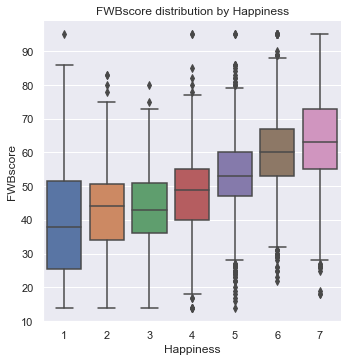

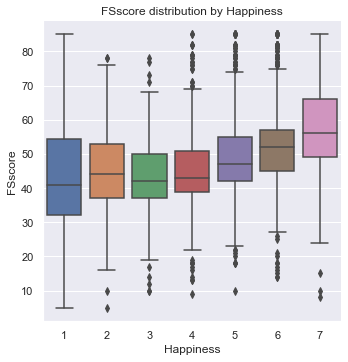

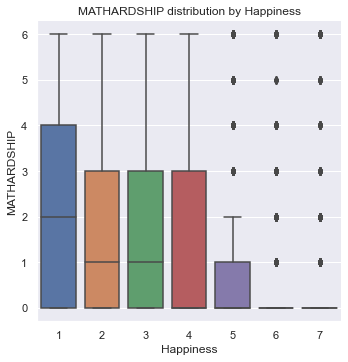

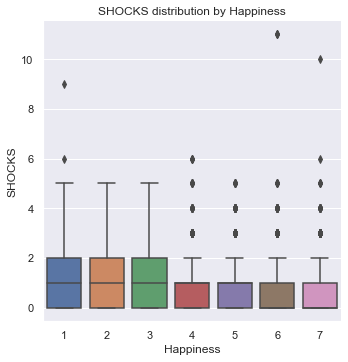

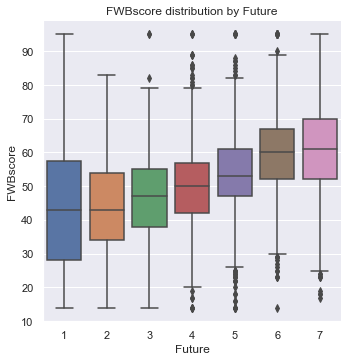

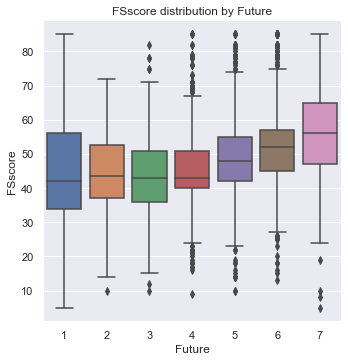

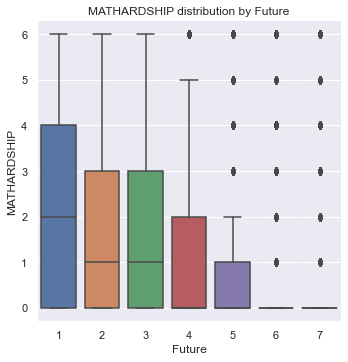

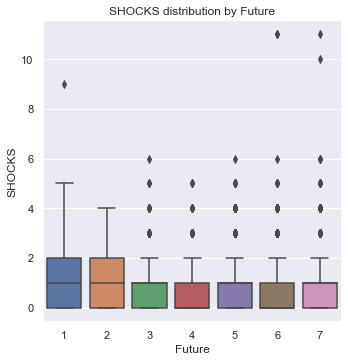

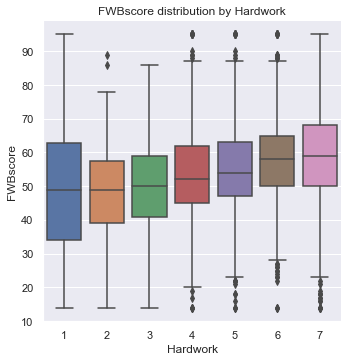

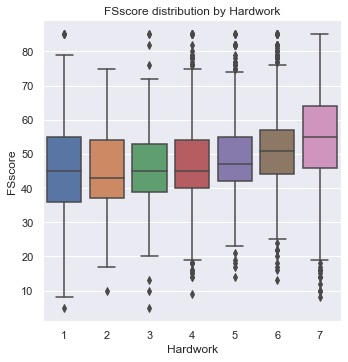

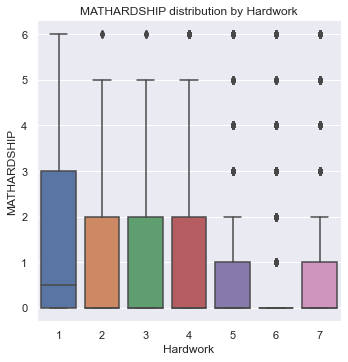

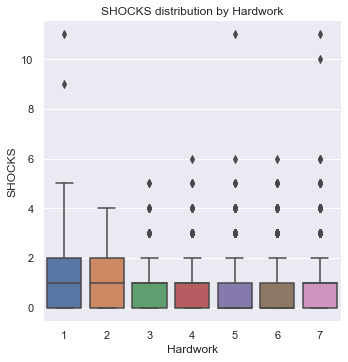

In [57]:
x_columns = ["Happiness", "Future", "Hardwork"]
y_columns = ["FWBscore", "FSscore", "MATHARDSHIP", "SHOCKS"]

for x in x_columns:
    for y in y_columns:
        sns.catplot(x=x, y=y, data=df, kind="box")
        plt.title(f"{y} distribution by {x}")
        plt.show()

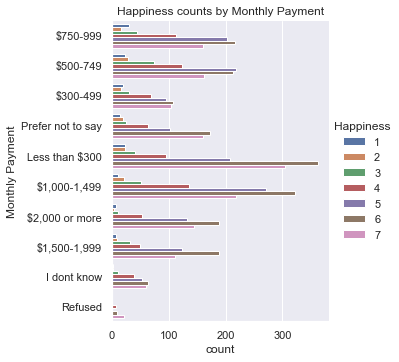

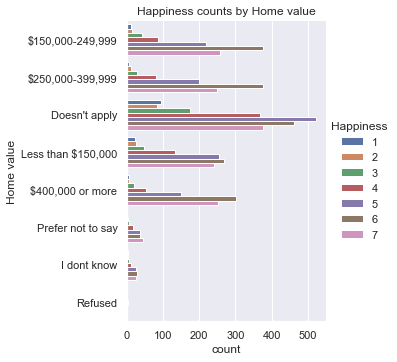

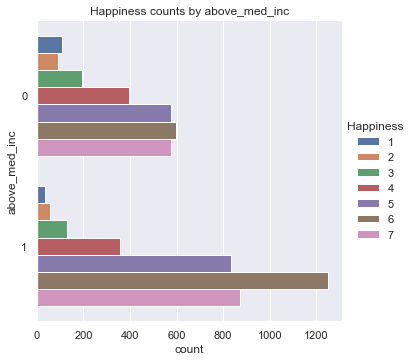

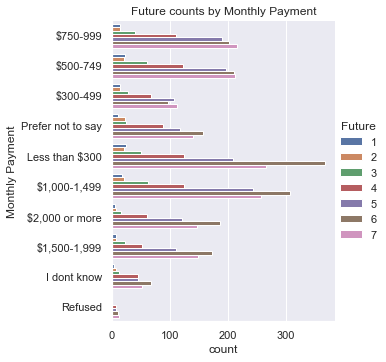

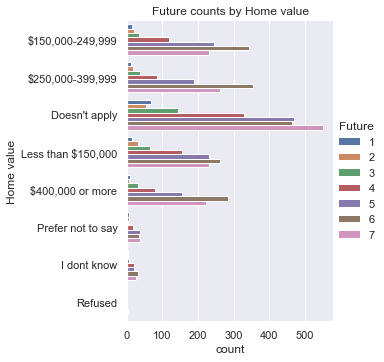

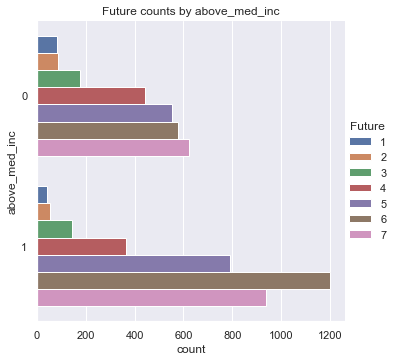

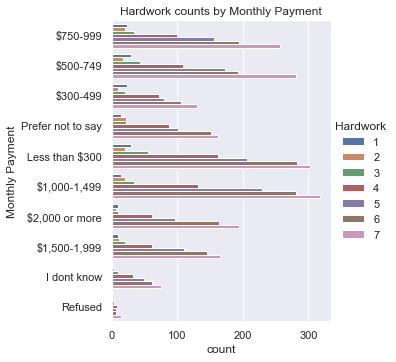

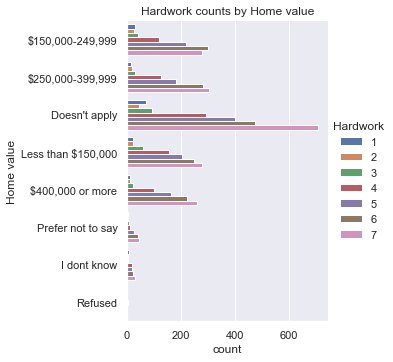

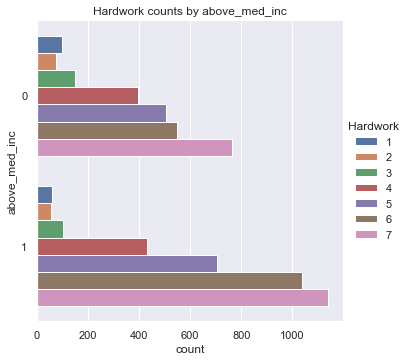

In [58]:
hue_columns = ["Happiness", "Future", "Hardwork"]
x_columns = ["Monthly Payment", "Home value", "above_med_inc"]

for hue in hue_columns:
    for x in x_columns:
        sns.catplot(y=x, hue=hue, data=df, kind="count", orient="h")
        plt.title(f"{hue} counts by {x}")
        plt.show()

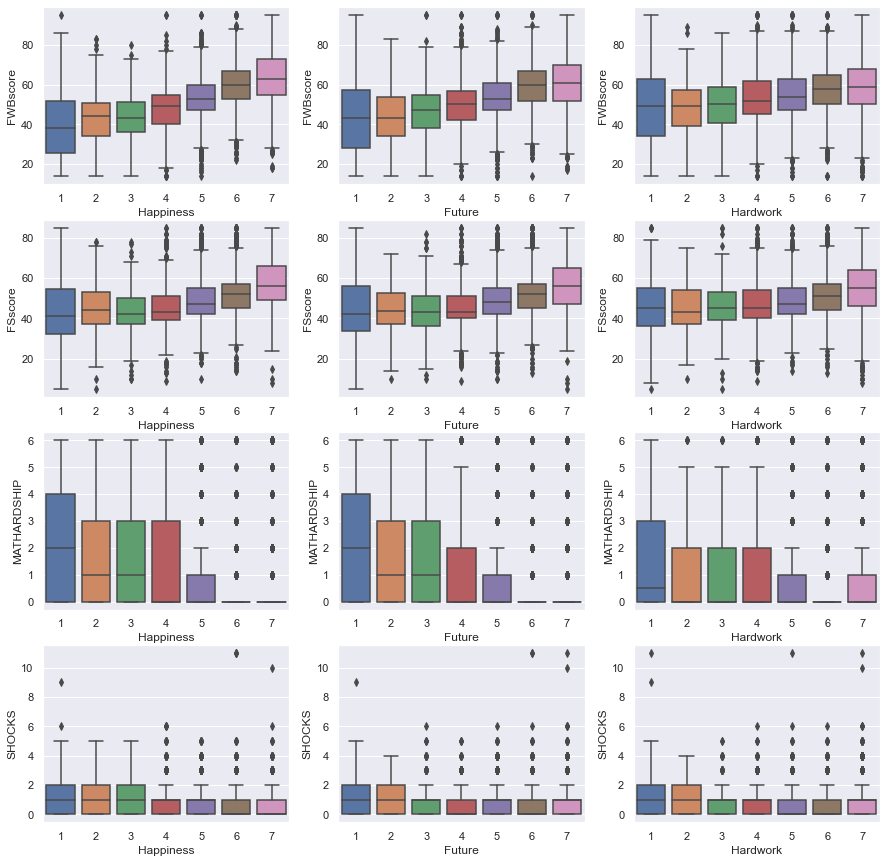

In [59]:
cols = ["Happiness", "Future", "Hardwork"]
rows = ["FWBscore", "FSscore", "MATHARDSHIP", "SHOCKS"]
fig, ax = plt.subplots(nrows=len(rows), ncols=len(cols), figsize=(15, 15))
for row in range(len(rows)): 
    for col in range(len(cols)):
        sns.boxplot(x=cols[col], y=rows[row], data=df, ax=ax[row, col])

plt.show()